In [76]:
# import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Model0
from sklearn.linear_model import LogisticRegression,LinearRegression

# Métricas
from sklearn.metrics import accuracy_score, classification_report, roc_curve

import warnings as wr
wr.filterwarnings("ignore") #to ignore the warnings

### 1. Limpieza y tratamiento de Datos

In [77]:
# Leemos el csv Heart
df=pd.read_csv("heart.csv")

# Buscamos las 5 primeras filas y vemos que datos tenemos
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
# Contabilizamos el número de filas y columnas que tenemos

print('Número de filas =',df.shape[0], 'y número de columnas =',df.shape[1])

Número de filas = 303 y número de columnas = 14


In [79]:
# Vamos a eliminar una serie de columnas que no nos interesan para nuestro análisis futuro.

df.drop(columns=['caa','restecg','slp','cp','oldpeak'],inplace = True)

In [80]:
df

,age,sex,trtbps,chol,fbs,thalachh,exng,thall,output
0,63,1,145,233,1,150,0,1,1
1,37,1,130,250,0,187,0,2,1
2,41,0,130,204,0,172,0,2,1
3,56,1,120,236,0,178,0,2,1
4,57,0,120,354,0,163,1,2,1
...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,3,0
299,45,1,110,264,0,132,0,3,0
300,68,1,144,193,1,141,0,3,0
301,57,1,130,131,0,115,1,3,0


In [81]:
# Ahora vamos a ver que información tenemos de nuestros datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   trtbps    303 non-null    int64
 3   chol      303 non-null    int64
 4   fbs       303 non-null    int64
 5   thalachh  303 non-null    int64
 6   exng      303 non-null    int64
 7   thall     303 non-null    int64
 8   output    303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


- Como podemos obervar, no tenemos ningun dato nulo en nuestras columnas. Además, vemos como todos los datos son de tipo enter a excepción de oldpeak que es float.

In [82]:
# Verificamos que no tengamos valores nulos.

df.isnull().sum()

age         0
sex         0
trtbps      0
chol        0
fbs         0
thalachh    0
exng        0
thall       0
output      0
dtype: int64

- Podemos concluir que tenemos un 0% de valores nulos en nuestros datos, por lo que a priori no deberemos utilizar ninguna fórmula de sunstitución de nulos. 

In [83]:
# Una vez analizados los valores nulos, vamos a ver si tenemos valores duplicados en nuestro dataset.

df.duplicated().sum()

1

In [84]:
# Eliminamos el valor duplicado obtenido y imprimimos por pantalla el número de filas resultantes.

df.drop_duplicates(inplace=True)
print('Number of rows are =',df.shape[0], ',and number of columns are =',df.shape[1])

Number of rows are = 302 ,and number of columns are = 9


In [85]:
# Hecho esto, vamos a ver como nos queda el análisis descriptivo de nuestros datos resultantes.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
thall,302.0,2.314570,0.613026,0.0,2.00,2.0,3.00,3.0
output,302.0,0.543046,0.498970,0.0,0.00,1.0,1.00,1.0


- La presión arterial promedio de un individuo es 131.6 mientras que el valor máximo sube a 200.
- La frecuencia cardíaca media del grupo es de 149.5, con un máximo de 202. Tambíen vemos que el 75% de los datos tienen valores inferiores a 166.
- La edad del grupo varía de 29 a 77 años y la media de edad es de 54.42.
- También podemos observar como tenemos más sex = 1 que igual a 0. Esto lo veamos porque el promedio es superior a 0.5, lo que nos indica que hay más valores igual a 1.

In [86]:
# Dividimos por el tipo de columnas que tenemos.

cat_cols = ['sex','exng','fbs','thall']
con_cols = ["age","trtbps","chol","thalachh"]
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'fbs', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh']
The target variable is :   ['output']


Text(0, 0.5, '')

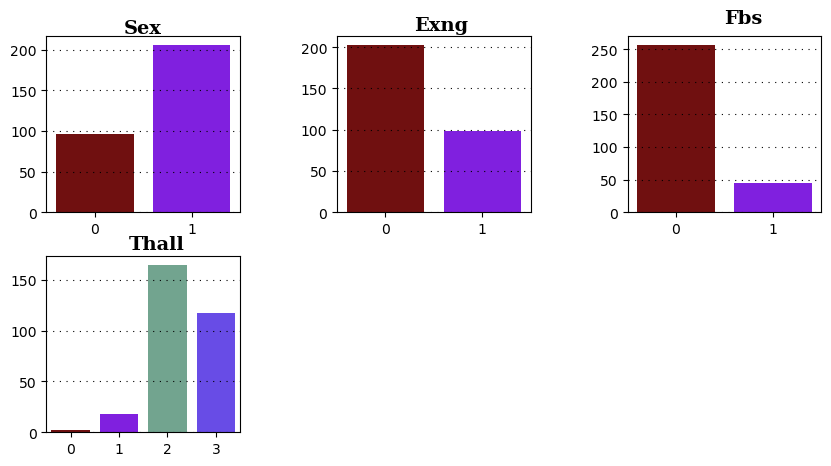

In [87]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Sex count
ax0.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax0,data=df,x='sex',palette=color_palette)
ax0.set_xlabel("")
ax0.set_ylabel("")

# Exng count
ax1.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='exng',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Fbs count
ax2.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='fbs',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Thall count
ax3.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='thall',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")



Text(0, 0.5, '')

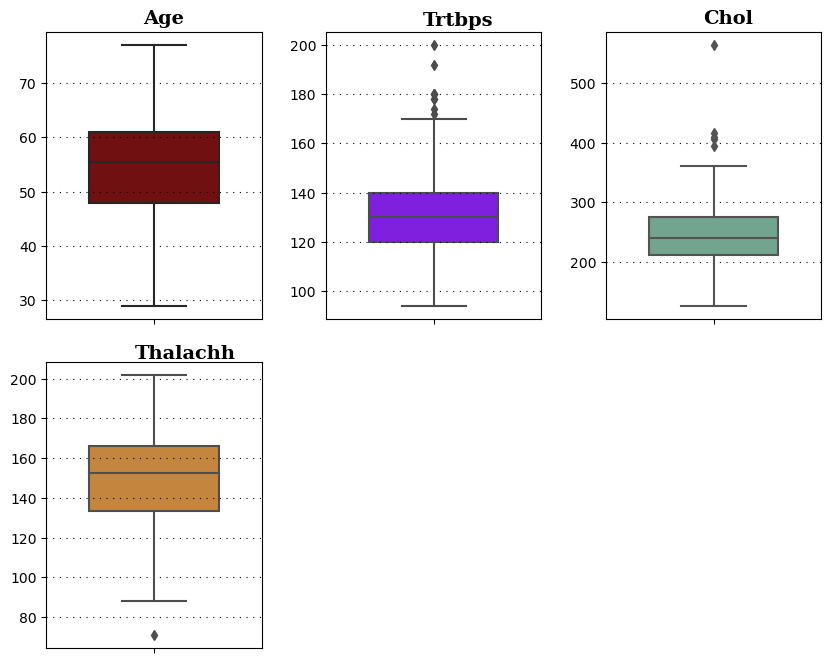

In [88]:
# Ahora vamos a ver como se distribuyen los valores en un boxplot. De este modo, podremos ver si tenemos algún outlier que podamos eliminar.

fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])

# Age 
ax0.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax0,y=df['age'],palette=["#800000"],width=0.6)
ax0.set_xlabel("")
ax0.set_ylabel("")

# Trtbps 
ax1.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax1,y=df['trtbps'],palette=["#8000ff"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Chol 
ax2.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax2,y=df['chol'],palette=["#6aac90"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Thalachh 
ax3.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxplot(ax=ax3,y=df['thalachh'],palette=["#da8829"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")


In [89]:
# Ahora vemos la correlación de núestrass varíables continuas

df_corr = df.corr().transpose()
df_corr

,age,sex,trtbps,chol,fbs,thalachh,exng,thall,output
age,1.000000,-0.094962,0.283121,0.207216,0.119492,-0.395235,0.093216,0.065317,-0.221476
sex,-0.094962,1.000000,-0.057647,-0.195571,0.046022,-0.046439,0.143460,0.211452,-0.283609
trtbps,0.283121,-0.057647,1.000000,0.125256,0.178125,-0.048023,0.068526,0.062870,-0.146269
chol,0.207216,-0.195571,0.125256,1.000000,0.011428,-0.005308,0.064099,0.096810,-0.081437
fbs,0.119492,0.046022,0.178125,0.011428,1.000000,-0.007169,0.024729,-0.032752,-0.026826
thalachh,-0.395235,-0.046439,-0.048023,-0.005308,-0.007169,1.000000,-0.377411,-0.094910,0.419955
exng,0.093216,0.143460,0.068526,0.064099,0.024729,-0.377411,1.000000,0.205826,-0.435601
thall,0.065317,0.211452,0.062870,0.096810,-0.032752,-0.094910,0.205826,1.000000,-0.343101
output,-0.221476,-0.283609,-0.146269,-0.081437,-0.026826,0.419955,-0.435601,-0.343101,1.000000


In [90]:
df.to_csv('heart_final.csv',decimal=",",encoding='utf-16')

### 2. Análisis Estadístico de Variables

In [91]:
from scipy.stats import chi2_contingency

# Creamos una tabla de contingencia para sex y output
ct = pd.crosstab(df["sex"], df["output"])

# Realizamos el chi-cuadrado
chi2, p, dof, expected = chi2_contingency(ct)

# Print
print(f"Chi-square test statistic: {chi2}")
print(f"p-value: {p}")

# Indicamos nuestro nivel de significancia
alpha = 0.05
if p < alpha:
    print("Existe relación entre el sexo y tener o no un infarto")
else:
    print("No existe relación entre el sexo y tener o no un infarto")

Chi-square test statistic: 23.083879459669042
p-value: 1.5508552054949547e-06
Existe relación entre el sexo y tener o no un infarto


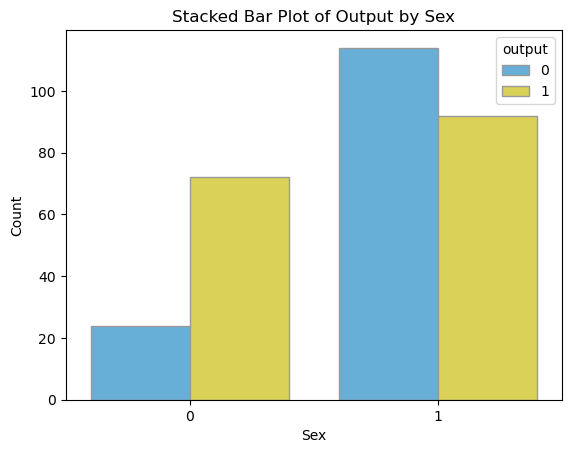

In [92]:
# Creamos un gráfico de barras por sexo.
sns.countplot(x="sex", hue="output", data=df,palette=["#56B4E9","#F0E442"],edgecolor=".6")

# Añadimos labels y título
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of Output by Sex")

plt.show()

In [93]:
# Hacemos algo parecido pero para ver si hay diferencias entre valores altos y bajos de chol y thalachh

from scipy.stats import norm

success_rate_low = df[(df["chol"] <= 200) & (df["thalachh"] <= 150)]["output"].mean()

success_rate_high = df[(df["chol"] > 200) & (df["thalachh"] > 150)]["output"].mean()

# Calculamos nuestro valor z de contraste
z =(success_rate_high - success_rate_low)/np.sqrt((success_rate_low * (1 - success_rate_low)) / 
                                                            len(df[(df["chol"] > 200) & (df["thalachh"] > 150)]) + 
                                                            (success_rate_high * (1 - success_rate_high)) / 
                                                            len(df[(df["chol"] > 200) & (df["thalachh"] > 150)]))

# Calculamos el p-value gracias a nuestra z.
p = 2 * (1 - norm.cdf(abs(z)))

# Añadimo el valor de significancia.
alpha = 0.05
if p < alpha:
    print(p, "Existe diferencia entre clientes con menos de 200 de colesterol y pacientes con más de 200 en colesterol")
else:
    print(p, "No existe diferencia entre clientes con menos de 200 de colesterol y pacientes con más de 200 en colesterol")

4.96589436238537e-11 Existe diferencia entre clientes con menos de 200 de colesterol y pacientes con más de 200 en colesterol


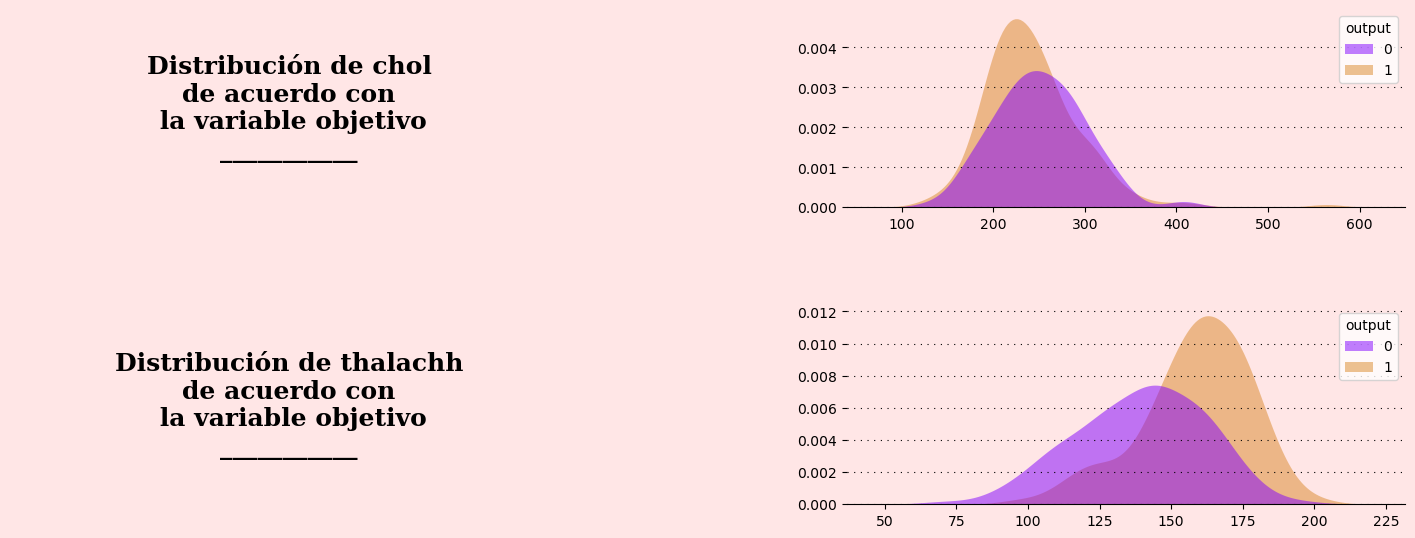

In [94]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)


# título Chol
ax0.text(0.5,0.5,"Distribución de chol\nde acuerdo con\n la variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Chol
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")


# Título Thalachh
ax2.text(0.5,0.5,"Distribución de thalachh\nde acuerdo con\n la variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Thalachh
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)


### 3. Predicción

In [95]:
# Creamos una copia de df
df1 = df

# DEfinimos las columnas para realizar el encoding y el escalado
cat_cols = ['sex','exng','fbs','thall']
con_cols = ["age","trtbps","chol","thalachh"]

# Realizamos un encoding de las variables categóricas
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# Defiimos la variable X e Y
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# Escalamos nuestros datos
scaler = RobustScaler()

X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,sex_1,exng_1,fbs_1,thall_1,thall_2,thall_3
0,0.576923,0.75,-0.117647,-0.076336,1,0,1,1,0,0
1,-1.423077,0.00,0.149020,1.053435,1,0,0,0,1,0
2,-1.115385,0.00,-0.572549,0.595420,0,0,0,0,1,0
3,0.038462,-0.50,-0.070588,0.778626,1,0,0,0,1,0
4,0.115385,-0.50,1.780392,0.320611,0,1,0,0,1,0


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("El tamaño de X_train es  ", X_train.shape)
print("El tamaño de X_test es   ",X_test.shape)
print("El tamaño de y_train es  ",y_train.shape)
print("El tamaño de y_test es   ",y_test.shape)

El tamaño de X_train es   (241, 10)
El tamaño de X_test es    (61, 10)
El tamaño de y_train es   (241, 1)
El tamaño de y_test es    (61, 1)


In [97]:
# Instanciamos el modelo
model = LogisticRegression()

# Hacemos un fit sobre los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos el predict sobre los datos de test.
y_pred = model.predict(X_test)

# Vemos la precisión del modelo
print("La accuracy es ", accuracy_score(y_test, y_pred))

La accuracy es  0.819672131147541


In [98]:
model.intercept_

array([1.33231298])

In [99]:
model.coef_

array([[-0.23403231, -0.38330727, -0.19594377,  0.88928466, -1.07073171,
        -1.21505946,  0.43143275, -0.14902272,  0.74539303, -0.98051027]])

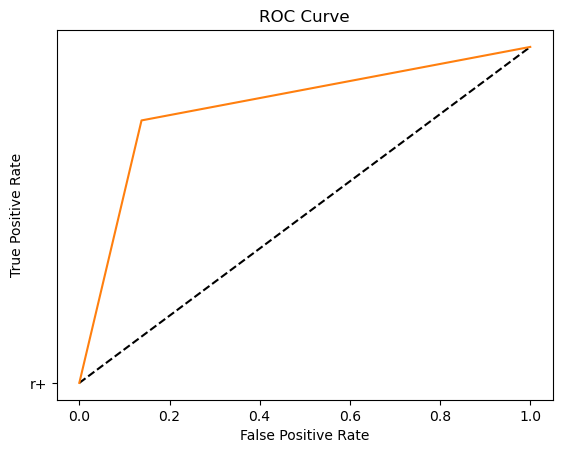

In [100]:
# Realizamos la curva roc.
fpr,tpr,threshols=roc_curve(y_test,y_pred)

plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()